In [20]:
# https://github.com/AlxndrJhn/Sampling_Path_Planning_VF_Curve_Tracking/blob/master/MAIN_CODE.ipynb
# The Vector-Field VF(x)¶
# (taken from Goncalves2011, see (1) and (2) for the definitions of $\alpha_i$ )


In [21]:
import numpy as np

# super simple VF wih a limit cycle in a plane ring in he 3D space

# center of the ring that will span in the xy-plane with unifom heigt zc
xc = 0.0
yc = 0.0
zc = 1.0 # because it is a quadcopter 

# radius
r = 3.0

# weights
wc = 1.0
watt = 3.0

#Vector Field function as R³->R³
def VF(pos,goalCheck=False,otherDir=False):
    x = pos[0]
    y = pos[1]
    z = pos[2]

    alpha = np.arctan2(y-yc,x-xc)

    # circulating term, unit vector perpencular to the circle
    circ = np.zeros(3)
    circ[0] = -np.sin(alpha)
    circ[1] = np.cos(alpha)

    # attracting term, unit vector towards the ring
    xt = xc-x
    yt = yc-y
    zt = zc-z
    l = np.linalg.norm([xt,yt])
    
    att = (l-r)/l*np.array([xt,yt,0])
    att[2] = zt
    
    if goalCheck:
        #pdb.set_trace()
        angleOfCirc = np.arctan2(circ[1],circ[0])
        anglDist = np.arctan2(np.sin(angleOfCirc-pos[3]), np.cos(angleOfCirc-pos[3]))
        #if np.abs(l-r)<0.2 and np.abs(zt)<0.2 and np.abs(anglDist)<10./180.*np.pi: #
        if np.linalg.norm(att)<eps_dist and np.abs(anglDist)<eps_angle/180.*np.pi:
            return True
        else:
            return False
    

    # weighting
    if otherDir:
        vec = -wc*circ+watt*att
    else:
        vec =  wc*circ+watt*att
    
    return vec/np.linalg.norm(vec)

def VFangle(pos):
    v = VF(pos)
    a = np.arctan2(v[1],v[0])
    #if a<0:
    #    a+=2*np.pi
    
    return a
  
    

In [22]:
# RK4 for time-invariant function f, stepsize h and initial configuration y0
def rk4_int(f,y0,h):
    k1=f(y0)
    k2=f(y0+h/2*k1)
    k3=f(y0+h/2*k2)
    k4=f(y0+h*k3)
    
    return y0+h/6*(k1+2*k2+2*k3+k4)


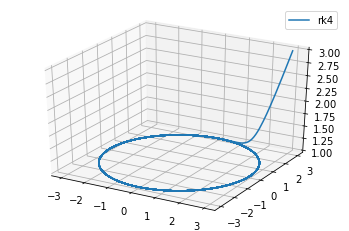

In [23]:
# Show the VF integral
# just show some integral curve
# from scipy.integrate import odeint
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt


pos = [3.0, 3.0, 3.0]

def f(pos,t0):
    return VF(pos)*0.1

#curve2 = odeint(func=f,y0=pos,t=range(0,400))
curve=np.empty([4000,3])
for i in range(0,4000):
    curve[i,:] = pos
    pos = rk4_int(VF,pos,0.1)

#mpl.rcParams['legend.fontsize'] = 10

#uncomment for plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(curve[:,0], curve[:,1], curve[:,2], label='rk4')
ax.legend()

# ax.plot(curve2[:,0], curve2[:,1], curve2[:,2], label='odeint')



plt.show()

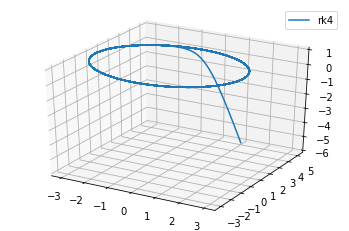

In [24]:
# Show the VF integral
# just show some integral curve
# from scipy.integrate import odeint
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt


pos = [1, 5, -6]

def f(pos,t0):
    return VF(pos)*0.1

#curve2 = odeint(func=f,y0=pos,t=range(0,400))
curve=np.empty([4000,3])
for i in range(0,4000):
    curve[i,:] = pos
    pos = rk4_int(VF,pos,0.1)

#mpl.rcParams['legend.fontsize'] = 10

#uncomment for plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(curve[:,0], curve[:,1], curve[:,2], label='rk4')
ax.legend()

# ax.plot(curve2[:,0], curve2[:,1], curve2[:,2], label='odeint')



plt.show()

In [25]:
# TODO figure out how this attracting - repelling vector trajectory works 